# Group Fake News Project
# Part 0: Form Study Groups
* Alf Kristiansen XGV820
* Alexander
* Victor
* Diego

# Part 1: Data Processing
### Task 1: Retrieve sample of FakeNewsCorups
https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv

Check requirements for version control for our libraries used in this project.
- MatPlotLib 
- scikit-learn
- pandas
- Selenium
- NLTK




In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import pandas as pd
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv("995,000_rows.csv", usecols = ["type", "content"])
df = df.dropna()

omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    df = df[df.type != omit_type]

stopwords = stopwords.words('english')

def full_clean(text: str, stopwords=stopwords):
    text = text.lower()

    text = re.sub(r'\n', ' ', text) # Remove newlines
    text = re.sub(r' +', ' ', text) # Remove multiple spaces

    text = re.sub(r'([a-zA-Z]+) (\d+)[, ]? (\d{4})', '<DATE>', text) # Date substitution
    text = re.sub(r'([.a-zA-Z0-9]+)@([-a-zA-Z0-9]+).([a-zA-Z]+)', '<EMAIL>', text) # E-Mail substitution
    text = re.sub(r'(https?:\/\/)?(www.)?([-.a-zA-Z0-9]+)[.](co.uk|com|org|net)\/?([\%\-\.\?\_=a-zA-Z0-9\/]+)?', '<URL>', text) # URL substitution
    text = re.sub(r'[0-9]+', '<NUM>', text) # Number substitution

    stemmer = PorterStemmer()                                   # Porter Stemmer from nltk
    tokens = nltk.word_tokenize(text)                           # Tokenizing the text
    tokens = [word for word in tokens if word.isalpha()]        # Removing punctuation
    tokens = [word for word in tokens if word not in stopwords] # Removing Stopwords
    tokens = [stemmer.stem(word) for word in tokens]            # Stemming all the words
    return ' '.join(tokens) # Returning a string consisting of each word in the list

df["content"] = df["content"].apply(full_clean)

def is_credible(article_type):
    if article_type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
        return int(0)
    
    elif article_type in ['clickbait', 'political', 'reliable']:
        return int(1)
    
    else:
        return int(2)
    
df['type'] = df['type'].apply(is_credible)

# Store Results

# Save Cleaned Data
df.to_csv("cleaned_995000_news.csv", index=False)

# Display Sample Results
print(df[["content"]].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alfem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              content
0   plu one articl googl plu thank ali alfoneh ass...
1   cost best senat bank committe jp morgan buy nu...
2   man awoken num coma commit suicid learn donald...
3   julia geist ask draw pictur comput scientist l...
4   num compil studi vaccin danger activist post n...
5   spend major wake hour stare contentedli comput...
6   disclaim gener inform law topic noth diari con...
7   new report identifi num epicent worldwid chang...
9   dear reader excit announc voic russia chang na...
10  plu one articl googl plu thank ali alfoneh ass...


In [1]:
new_sample = pd.read_csv("cleaned_995000_news.csv")
new_sample = new_sample.dropna()

print(new_sample.head(100))

NameError: name 'pd' is not defined

### Task 2: Apply data pre-processing pipeline

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re

def clean_data(raw_text: str):
    text = raw_text.lower()

    text = re.sub(r'\n', ' ', text) # Remove newlines
    text = re.sub(r' +', ' ', text) # Remove multiple spaces

    text = re.sub(r'([a-zA-Z]+) (\d+)[, ]? (\d{4})', '<DATE>', text) # Date substitution
    text = re.sub(r'([.a-zA-Z0-9]+)@([-a-zA-Z0-9]+).([a-zA-Z]+)', '<EMAIL>', text) # E-Mail substitution
    text = re.sub(r'(https?:\/\/)?(www.)?([-.a-zA-Z0-9]+)[.](co.uk|com|org|net)\/?([\%\-\.\?\_=a-zA-Z0-9\/]+)?', '<URL>', text) # URL substitution
    text = re.sub(r'[0-9]+', '<NUM>', text) # Number substitution

    return text

In [2]:
news = pd.read_csv('995,000_rows.csv', usecols=['type','content'])
news = news.dropna()

In [3]:
omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    news = news[news.type != omit_type]


In [4]:
news.head(995000)

,type,content
0,political,Plus one article on Google Plus\n\n(Thanks to ...
1,fake,The Cost Of The Best Senate Banking Committee ...
2,satire,Man Awoken From 27-Year Coma Commits Suicide A...
3,reliable,WHEN Julia Geist was asked to draw a picture o...
4,conspiracy,– 100 Compiled Studies on Vaccine Dangers (Act...
...,...,...
994992,reliable,The great thing about the phone camera is that...
994994,political,Plus one article on Google Plus\n\n(Thanks to ...
994995,conspiracy,By\n\n21WIRE + Intervention Watch | All we can...
994996,political,Plus one article on Google Plus\n\n(Thanks to ...


Text

In [5]:
news['content'] = news['content'].apply(clean_data)

In [6]:
news.head(10)

,type,content
0,political,plus one article on google plus (thanks to ali...
1,fake,the cost of the best senate banking committee ...
2,satire,man awoken from <NUM>-year coma commits suicid...
3,reliable,when julia geist was asked to draw a picture o...
4,conspiracy,– <NUM> compiled studies on vaccine dangers (a...
5,reliable,if you spend the majority of your waking hours...
6,political,disclaimer. this is general information on a l...
7,political,"a new report identifies <NUM> ""epicenters"" wor..."
9,bias,"dear readers, we are excited to announce that ..."
10,political,plus one article on google plus (thanks to ali...


### Task 3: Exploration of proccesed dataset

Distribution of types

In [7]:
def count_types(article_types):
    found_types = {}

    for article_type in article_types:
        if article_type in found_types:
            found_types[article_type] += 1
        else:
            found_types[article_type] = 1

    return found_types

count_types(list(news['type']))

{'political': 194518,
 'fake': 104883,
 'satire': 13160,
 'reliable': 218563,
 'conspiracy': 97314,
 'bias': 133232,
 'clickbait': 27412,
 'hate': 8779,
 'junksci': 14040}

In [ ]:
def fake_credible(types: dict):
    labels = [0, 0]
    
    for type in types:
        if type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
            labels[0] += types[type]
        elif type in ['clickbait', 'political', 'reliable']:
            labels[1] += types[type]

    return labels

fake_credible(count_types(list(news['type'])))

[371408, 440493]

* Vocab for frequency of words

In [41]:
vocab = []

for content in new_sample['content']:
    vocab.extend(nltk.word_tokenize(content))

vocab = [word for word in vocab if word.isalpha()]

In [42]:
def count_words(vocab):
    words = {}

    for word in vocab:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

    return words

In [43]:
sorted_vocab = {k: v for k, v in sorted(count_words(vocab).items(), key = lambda item: item[1], reverse=True)}

In [44]:
frequent_words_10k = pd.DataFrame({'word': list(sorted_vocab)[:10000]})
frequent_words_10k.to_csv("frequent_words_clean_10k.csv")

In [45]:
most_frequent_100 = dict(list(sorted_vocab.items())[:100])
most_frequent_100

{'num': 8017745,
 'said': 1217866,
 'one': 944701,
 'new': 896846,
 'time': 830588,
 'would': 814241,
 'state': 779366,
 'year': 771998,
 'peopl': 742483,
 'like': 706585,
 'also': 556282,
 'use': 534572,
 'us': 506477,
 'say': 506445,
 'make': 501004,
 'even': 490716,
 'get': 484887,
 'go': 474783,
 'work': 443292,
 'american': 434947,
 'news': 433105,
 'govern': 430360,
 'presid': 429693,
 'report': 423656,
 'stori': 422632,
 'first': 421827,
 'right': 420139,
 'two': 418301,
 'mani': 417754,
 'nation': 417465,
 'day': 416459,
 'trump': 414183,
 'could': 412891,
 'continu': 403298,
 'read': 403051,
 'come': 395119,
 'world': 372725,
 'take': 370850,
 'url': 363811,
 'last': 361356,
 'think': 355269,
 'want': 351099,
 'may': 349242,
 'know': 347894,
 'way': 347637,
 'includ': 346512,
 'call': 345688,
 'see': 341414,
 'iran': 334688,
 'back': 330864,
 'york': 326268,
 'polit': 324966,
 'need': 322894,
 'date': 321471,
 'countri': 319394,
 'public': 318547,
 'support': 313988,
 'tri': 3

In [47]:
print('Amount of URLS:', sorted_vocab['url'])
print('Amount of Dates:', sorted_vocab['date'])
print('Amount of Numbers:', sorted_vocab['num'])
print('Amount of Emails:', sorted_vocab['email'])

Amount of URLS: 363811
Amount of Dates: 321471
Amount of Numbers: 8017745
Amount of Emails: 175519


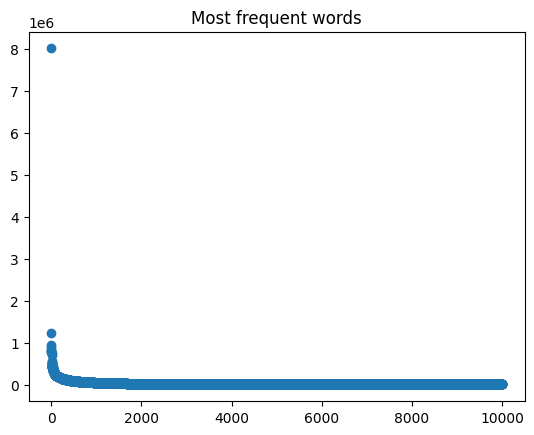

In [48]:
plt.figure()
plt.scatter(list(range(10000)), list(sorted_vocab.values())[:10000])
plt.title('Most frequent words')
plt.show()

The graph of most frequent words follow Zipf's law (which is a powerlaw)

### Task 4
We use the sklearn train_test_split function to split the data into the different sets

In [ ]:
from sklearn.model_selection import train_test_split

X = new_sample.drop(columns=["content"]).values  # Feature columns
y = new_sample["type"].values  # Target column

# 80% training and 20% rest for validation and test
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Split 20% into 10% validation and 10% test
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Print number of samples in each dataset
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 649520
Validation set size: 81190
Test set size: 81190


# Part 2: Simple Logitstic Regression

* Binary classification: `reliabe` or `fake`

### Task 0: Label grouping


0: `fake`
1: `reliable`

In [54]:
'''def is_credible(article_type):
    if article_type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
        return 0
    elif article_type in ['clickbait', 'political', 'reliable']:
        return 1
    
news['type'] = news['type'].apply(is_credible)'''

"def is_credible(article_type):\n    if article_type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:\n        return 0\n    elif article_type in ['clickbait', 'political', 'reliable']:\n        return 1\n    \nnews['type'] = news['type'].apply(is_credible)"

### Task 1: Logistic regression classifier
* Fixed vocab of 10000 most frequent words.

* F1 score

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# 10000 most frequent words
freq_words = pd.read_csv('frequent_words_clean_10k.csv')

def text_to_features(text, vocab):
    """Convert text into a word frequency vector based on a fixed vocabulary."""
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenization using regex
    word_counts = Counter(words)  # Count occurrences of each word
    return [word_counts.get(word, 0) for word in vocab]  # Keep only vocab words

# Apply Function to the Entire Dataset
X = np.array([text_to_features(content, freq_words) for content in new_sample["content"]])
y = new_sample["type"].values  # Target variable

# Train/Test Split (80% Train, 10% Validation, 10% Test)
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0, stratify=y_vt)

# Train Logistic Regression Model
modelLog = LogisticRegression(max_iter=500, solver="lbfgs", C=1.0)
modelLog.fit(X_train, y_train)

# Make Predictions
y_pred = modelLog.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Results
print("Logistic Regression Accuracy: ", accuracy)
print("Logistic Regression F1-score: ", f1)

In [51]:
target_news = pd.read_csv("bbc_news_sample.csv")

target_news["content"] = target_news["content"].apply(full_clean)

target_news.to_csv("cleaned_bbc_news_sample.csv", index=False)

In [ ]:
new_news = pd.read_csv("bbc_news_sample.csv")
# Transform the "content" Column into Word Count Vectors**
X_new = np.array([text_to_features(content, freq_words) for content in new_news["content"]])

# Predict Fake or Reliable
new_predictions = modelLog.predict(X_new)

# Store Results
new_news["prediction"] = new_predictions  # Append predictions to the dataset

# Save Predictions to a CSV File
new_news.to_csv("classified_bbc_news.csv", index=False)

# Display Results
print(new_news[["content", "prediction"]].head(10))  # Show first 10 predictions

                                             content  prediction
0  Romanian far-right populist Calin Georgescu ha...           1
1  The Trump administration believes Ukraine's le...           1
2  A whippet from Venice in Italy has been named ...           1
3  At least 25 people have died in Ukraine in the...           1
4  Pope Francis, who has been battling pneumonia ...           1
5  US Secretary of State Marco Rubio and Elon Mus...           1
6  A journalist targeted by a Russian spy ring sa...           1
7  US President Donald Trump has said he is findi...           1
8  In January visa changes which prevented Ukrain...           1
9  Leading European nations have said they suppor...           1


In [ ]:
classified_news = pd.read_csv("classified_bbc_news.csv")
classified_news["prediction"]

def counting(classified):
    reliable = 0
    fake = 0

    for classification in classified:
        if classification == 0 :
            fake += 1
        elif classification == 1:
            reliable += 1

    return (f"classified articles  fake: {fake}, and reliable: {reliable}")

counting(list(classified_news['prediction']))

'classified articles fake: 0, and reliable: 338'

### Task 2: meta-data features?

### Task 3: Apply preproccessing pipeline to scraped reliable data

In [ ]:
# abc


# Part 3: Advanced model